In [10]:
import pandas as pd

In [5]:
!ls

Data  ENCFF724VHG.bed.gz  sample_data


In [3]:
!mv ENCFF296PQE.bed.gz Data

In [6]:
!mv ENCFF724VHG.bed.gz Data

In [7]:
!gunzip Data/ENCFF724VHG.bed.gz

In [8]:
!gunzip Data/ENCFF296PQE.bed.gz

In [21]:
!ls Data

ENCFF296PQE.bed  ENCFF724VHG.bed


In [24]:
df_f = pd.read_csv('Data/ENCFF296PQE.bed', sep='\t', header=None)

In [25]:
df_s = pd.read_csv('Data/ENCFF724VHG.bed', sep='\t', header=None)

In [29]:
df_f[range(5)], df_s[range(5)]

(          0          1          2           3    4
 0      chr1  100315479  100316654   Peak_6302  152
 1      chr1  100781764  100782449  Peak_43798   69
 2      chr1  100889258  100891474  Peak_29264   82
 3      chr1  101040071  101041577  Peak_28884   84
 4      chr1  101472259  101472831  Peak_37034   73
 ...     ...        ...        ...         ...  ...
 40398  chrY   26437111   26437446  Peak_16614  111
 40399  chrY   26638035   26640544   Peak_2638  210
 40400  chrY   26640580   26644741    Peak_560  361
 40401  chrY   26649940   26650495   Peak_9574  132
 40402  chrY   26651550   26656861    Peak_923  300
 
 [40403 rows x 5 columns],           0          1          2            3    4
 0      chr1  100319901  100320547   Peak_51601   61
 1      chr1  100649682  100650001   Peak_12718   90
 2      chr1  100889546  100890307  Peak_181126   28
 3      chr1  101040119  101040991   Peak_24771   77
 4      chr1  101041497  101041806   Peak_58293   57
 ...     ...        ...       

In [35]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

51357


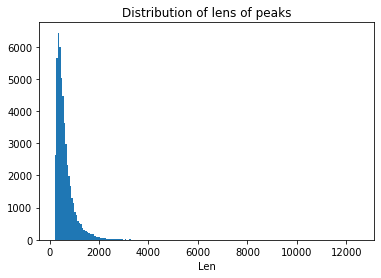

In [42]:
figure = plt.figure()
axes = figure.subplots()

axes.hist(df_s[2] - df_s[1], bins=200)
axes.set_xlabel('Len')
axes.set_title('Distribution of lens of peaks')
pdf = PdfPages("Hist_ENCFF724VHG.pdf")
pdf.savefig(figure)
pdf.close()

print(len(df_s))

40403


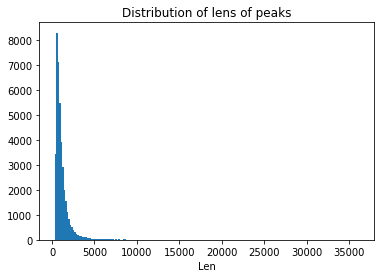

In [43]:
figure = plt.figure()
axes = figure.subplots()

axes.hist(df_f[2] - df_f[1], bins=200)
axes.set_xlabel('Len')
axes.set_title('Distribution of lens of peaks')
pdf = PdfPages("Hist_ENCFF296PQE.pdf")
pdf.savefig(figure)
pdf.close()

print(len(df_f))

In [ ]:
threshold = 5000

In [44]:
df_s_filtered = df_s[(df_s[2] - df_s[1]) < 5000]
df_f_filtered = df_f[(df_f[2] - df_f[1]) < 5000]

In [103]:
df_s_filtered[range(5)].to_csv('Data/ENCFF724VHG.filtered.bed', header=False, index=False, sep='\t')
df_f_filtered[range(5)].to_csv('Data/ENCFF296PQE.filtered.bed', header=False, index=False, sep='\t')


51342


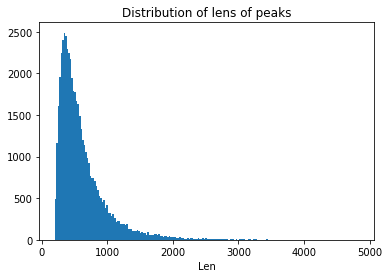

In [49]:
figure = plt.figure()
axes = figure.subplots()

axes.hist(df_s_filtered[2] - df_s_filtered[1], bins=200)
axes.set_xlabel('Len')
axes.set_title('Distribution of lens of peaks')
pdf = PdfPages("Hist_ENCFF724VHG_filtered.pdf")
pdf.savefig(figure)
pdf.close()

print(len(df_s_filtered))

In [85]:
!apt-get install bedtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 577 kB of archives.
After this operation, 2,040 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 bedtools amd64 2.26.0+dfsg-5 [577 kB]
Fetched 577 kB in 1s (621 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../bedtools_2.26.0+dfsg-5_amd64.deb ...
Unpacking bedtools (2.26.0+dfsg-5) ...
Setting up bedtools (2.26.0+dfsg-5) ...


In [105]:
!cat Data/*.filtered.bed | sort -k1,1 -k2,2n | bedtools merge > Data/H3K9me3_H9.merge.hg19.bed

39880


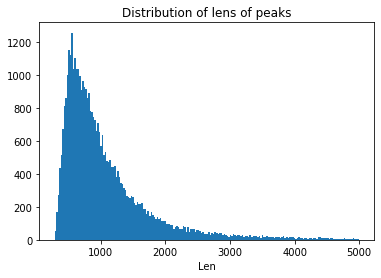

In [50]:
figure = plt.figure()
axes = figure.subplots()

axes.hist(df_f_filtered[2] - df_f_filtered[1], bins=200)
axes.set_xlabel('Len')
axes.set_title('Distribution of lens of peaks')
pdf = PdfPages("Hist_ENCFF296PQE_filtered.pdf")
pdf.savefig(figure)
pdf.close()

print(len(df_f_filtered))

In [97]:
!pip install rpy2
%reload_ext rpy2.ipython


In [108]:
%%R
BiocManager::install('org.Hs.eg.db')

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.13 (BiocManager 1.30.15), R 4.1.0 (2021-05-18)

R[write to console]: Installing package(s) 'org.Hs.eg.db'

R[write to console]: trying URL 'https://bioconductor.org/packages/3.13/data/annotation/src/contrib/org.Hs.eg.db_3.13.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 83002050 bytes (79.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [110]:
%%R
install.packages("ChIPseeker")

library(ggplot2)
library(dplyr)
library(tidyr)   # replace_na
library(tibble)  # column_to_rownames
DATA_DIR <- 'Data/'
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
#library(clusterProfiler)

NAME <- 'ENCFF296PQE.filtered'
BED_FN <- paste0(DATA_DIR, NAME, '.bed')

###

txdb <- TxDb.Hsapiens.UCSC.hg19.knownGene

peakAnno <- annotatePeak(BED_FN, tssRegion=c(-3000, 3000), TxDb=txdb, annoDb="org.Hs.eg.db")

OUT_DIR <- 'Data/'
#pdf(paste0(OUT_DIR, 'chip_seeker.', NAME, '.plotAnnoPie.pdf'))
png(paste0(OUT_DIR, 'chip_seeker.', NAME, '.plotAnnoPie.png'))
plotAnnoPie(peakAnno)
dev.off()


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



>> loading peak file...				 2021-06-09 02:49:54 PM 
>> preparing features information...		 2021-06-09 02:49:54 PM 
>> identifying nearest features...		 2021-06-09 02:49:54 PM 
>> calculating distance from peak to TSS...	 2021-06-09 02:49:55 PM 
>> assigning genomic annotation...		 2021-06-09 02:49:55 PM 
>> adding gene annotation...			 2021-06-09 02:49:59 PM 


R[write to console]: 'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-06-09 02:49:59 PM 
>> done...					 2021-06-09 02:49:59 PM 
png 
  2 


In [111]:
!wget https://raw.githubusercontent.com/vanya-antonov/hse21_H3K4me3_ZDNA_human/main/data/DeepZ.bed

--2021-06-09 14:58:10--  https://raw.githubusercontent.com/vanya-antonov/hse21_H3K4me3_ZDNA_human/main/data/DeepZ.bed
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461744 (451K) [text/plain]
Saving to: ‘DeepZ.bed’

DeepZ.bed           100%[===================>] 450.92K  --.-KB/s    in 0.08s   

2021-06-09 14:58:10 (5.38 MB/s) - ‘DeepZ.bed’ saved [461744/461744]



In [112]:
!mv DeepZ.bed Data/

In [113]:
df_z = pd.read_csv('Data/DeepZ.bed', sep='\t', header=None)

19394


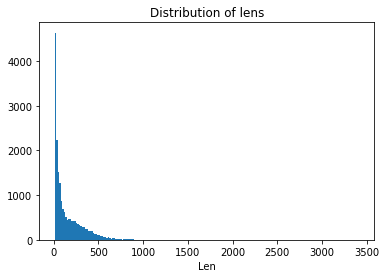

In [116]:
figure = plt.figure()
axes = figure.subplots()

axes.hist(df_z[2] - df_z[1], bins=200)
axes.set_xlabel('Len')
axes.set_title('Distribution of lens')
pdf = PdfPages("Hist_DeepZ.pdf")
pdf.savefig(figure)
pdf.close()

print(len(df_z))

In [117]:
%%R
install.packages("ChIPseeker")

library(ggplot2)
library(dplyr)
library(tidyr)   # replace_na
library(tibble)  # column_to_rownames
DATA_DIR <- 'Data/'
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
#library(clusterProfiler)

NAME <- 'DeepZ'
BED_FN <- paste0(DATA_DIR, NAME, '.bed')

###

txdb <- TxDb.Hsapiens.UCSC.hg19.knownGene

peakAnno <- annotatePeak(BED_FN, tssRegion=c(-3000, 3000), TxDb=txdb, annoDb="org.Hs.eg.db")

OUT_DIR <- 'Data/'
#pdf(paste0(OUT_DIR, 'chip_seeker.', NAME, '.plotAnnoPie.pdf'))
png(paste0(OUT_DIR, 'chip_seeker.', NAME, '.plotAnnoPie.png'))
plotAnnoPie(peakAnno)
dev.off()


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



>> loading peak file...				 2021-06-09 03:25:49 PM 
>> preparing features information...		 2021-06-09 03:25:49 PM 
>> identifying nearest features...		 2021-06-09 03:25:49 PM 
>> calculating distance from peak to TSS...	 2021-06-09 03:25:50 PM 
>> assigning genomic annotation...		 2021-06-09 03:25:50 PM 
>> adding gene annotation...			 2021-06-09 03:25:53 PM 


R[write to console]: 'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2021-06-09 03:25:53 PM 
>> done...					 2021-06-09 03:25:53 PM 
png 
  2 


In [118]:
!bedtools intersect -a Data/DeepZ.bed -b Data/H3K9me3_H9.merge.hg19.bed > Data/H3K9me3_H9.intersect_with_DeepZ.bed


In [119]:
df_int = pd.read_csv('Data/H3K9me3_H9.intersect_with_DeepZ.bed', sep='\t', header=None)

In [120]:
df_int

,0,1,2
0,chr1,2787920,2788082
1,chr1,3030787,3031033
2,chr1,29563691,29564213
3,chr1,44883660,44883798
4,chr1,44889645,44889787
...,...,...,...
506,chrX,153665378,153665620
507,chrX,153718909,153718933
508,chrX,153718973,153718984
509,chrX,155259817,155260303


511


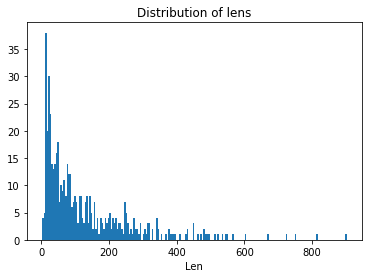

In [121]:
figure = plt.figure()
axes = figure.subplots()

axes.hist(df_int[2] - df_int[1], bins=200)
axes.set_xlabel('Len')
axes.set_title('Distribution of lens')
pdf = PdfPages("Hist_intersection.pdf")
pdf.savefig(figure)
pdf.close()

print(len(df_int))

In [124]:
%%R
BiocManager::install('ChIPpeakAnno')

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.13 (BiocManager 1.30.15), R 4.1.0 (2021-05-18)

R[write to console]: Installing package(s) 'ChIPpeakAnno'

R[write to console]: also installing the dependencies ‘AnnotationFilter’, ‘ProtGenerics’, ‘BSgenome’, ‘ensembldb’, ‘RBGL’, ‘VennDiagram’, ‘graph’, ‘InteractionSet’, ‘multtest’, ‘regioneR’


R[write to console]: trying URL 'https://bioconductor.org/packages/3.13/bioc/src/contrib/AnnotationFilter_1.16.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 312037 bytes (304 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [125]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)   # replace_na
library(tibble)  # column_to_rownames
DATA_DIR <- 'Data/'
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
#library(clusterProfiler)

library(ChIPpeakAnno)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
library(org.Hs.eg.db)
#library(TxDb.Mmusculus.UCSC.mm10.knownGene)
#library(org.Mm.eg.db)

###


peaks <- toGRanges(paste0(DATA_DIR, 'H3K9me3_H9.intersect_with_DeepZ.bed'), format="BED")
peaks[1:2]

annoData <- toGRanges(TxDb.Hsapiens.UCSC.hg19.knownGene)
annoData[1:2]


anno <- annotatePeakInBatch(peaks, AnnotationData=annoData, 
                            output="overlapping", 
                            FeatureLocForDistance="TSS",
                            bindingRegion=c(-2000, 300))
data.frame(anno) %>% head()

anno$symbol <- xget(anno$feature, org.Hs.egSYMBOL)
data.frame(anno) %>% head()

anno_df <- data.frame(anno)
write.table(anno_df, file=paste0(DATA_DIR, 'H3K9me3_H9.intersect_with_DeepZ.genes.txt'),
            col.names = TRUE, row.names = FALSE, sep = '\t', quote = FALSE)

uniq_genes_df <- unique(anno_df['symbol'])
write.table(uniq_genes_df, file=paste0(DATA_DIR, 'H3K9me3_H9.intersect_with_DeepZ.genes_uniq.txt'),
            col.names = FALSE, row.names = FALSE, sep = '\t', quote = FALSE)


R[write to console]: duplicated or NA names found. Rename all the names by numbers.

R[write to console]:   403 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.

R[write to console]: Annotate peaks by annoPeaks, see ?annoPeaks for details.

R[write to console]: maxgap will be ignored.

